# Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import punkt
import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer 
from nltk.probability import FreqDist
import string, re
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
pd.set_option('display.max_columns', 1000)

In [4]:
data = pd.read_csv('tweets_2.csv')

# Checking out Data

In [5]:
data.head()

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


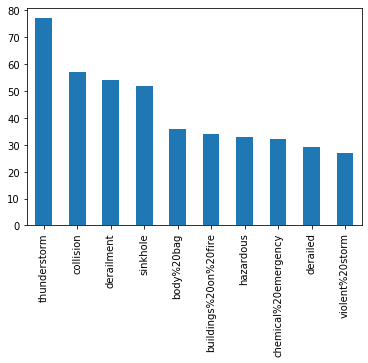

In [6]:
data[data.target == 1]['keyword'].value_counts().head(10).plot(kind = 'bar')

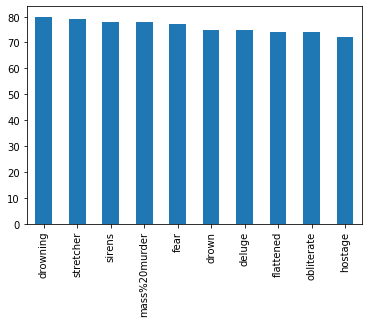

In [7]:
data[data.target == 0]['keyword'].value_counts().head(10).plot(kind = 'bar')

In [8]:
data.location.value_counts().head(10)

United States      96
Australia          83
London, England    81
UK                 77
India              74
London             69
United Kingdom     59
USA                52
California, USA    47
Los Angeles, CA    45
Name: location, dtype: int64

In [9]:
data.location.replace(['California, USA', 'Los Angeles, CA', 'United States'], 'USA', inplace= True)

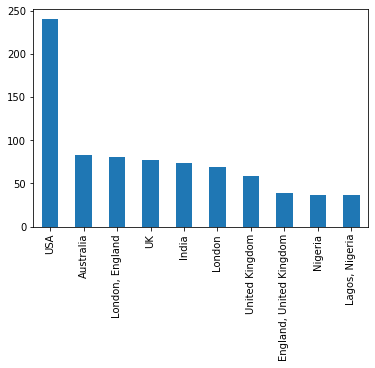

In [10]:
data.location.value_counts().head(10).plot(kind = 'bar')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 5 columns):
id          11370 non-null int64
keyword     11370 non-null object
location    7952 non-null object
text        11370 non-null object
target      11370 non-null int64
dtypes: int64(2), object(3)
memory usage: 444.3+ KB


In [12]:
# Checking for class imbalance
data.target.value_counts()

0    9256
1    2114
Name: target, dtype: int64

# Tokenizing Words

In [13]:
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9!]+')

data.text = data.text.apply(lambda x: tokenizer.tokenize(x))

In [14]:
data.head()

,id,keyword,location,text,target
0,0,ablaze,NaN,"[Communal, violence, in, Bhainsa, Telangana, S...",1
1,1,ablaze,NaN,"[Telangana, Section, 144, has, been, imposed, ...",1
2,2,ablaze,New York City,"[Arsonist, sets, cars, ablaze, at, dealership,...",1
3,3,ablaze,"Morgantown, WV","[Arsonist, sets, cars, ablaze, at, dealership,...",1
4,4,ablaze,NaN,"[Lord, Jesus, your, love, brings, freedom, and...",0


# Lemmitization

In [15]:
lemmatizer = WordNetLemmatizer() 

def lemm_text(words):
    lem = []
    for word in words:
        lem.append(lemmatizer.lemmatize(word))
    return lem  

In [16]:
data.text = data.text.apply(lambda x: lemm_text(x))

In [17]:
# Reformat to singular strings per observation
data.text = data.text.apply(lambda x: ','.join(x))
data.text = data.text.apply(lambda x: x.replace(',',' '))

# Vectorizing

In [18]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(data.text)


In [19]:
df = pd.DataFrame(text_counts.todense(),columns = cv.get_feature_names())
df.head()

,0,00,000,00009,000ft,000kg,007,0089,00am,00pm,00u3qm1ucs,01,0100z,011220,0131300,019,01hrs,01kst,02,025,02hmebw8dv,02toonorca,03,03077212577,03145411414,03486211155,039,03ekik7d1o,03y2h33rsp,03zvbylohw,04,05,06,0600,0600z,06mtdwbhl1,06qaylpjcu,07,0714,075c,078,07am,07pwcjiulm,07quv1ddgc,07vzcordws,08,080l803rqu,0819696,0830,0830z,08t8kmrlew,09,0948f5af,09tr7h2ctu,09wrbpstyq,0afhwif5pb,0bama,0clws8kkgv,0cz2rtixbc,0d,0dshjp9yos,0ebrzegvz2,0ecipspqez,0ekrxulcw2,0f1gffos9x,0fb8dvvurf,0fmins8glr,0fmptaqzdb,0fn8vnqxmq,0fwfgdkous,0fxnkwh70t,0georm5c3j,0gkjg4oygm,0gl7nucplb,0gmgepdevn,0h8s5pkznh,0hfbwmibge,0hi9l84yf9,0hr1hv8cic,0hvpgfahxl,0hwneglm1l,0ibtyylxig,0irc1liju2,0iv4ngq2aq,0jqtrxofen,0jxff8e62i,0kqnpgwwpf,0m0t9gknyo,0mbes99is0,0npm4os5kr,0nwlibbej9,0oieqp5chp,0p7jilsmuq,0pj9w88o6i,0q6rgn0zom,0qlg3g8yko,0qnlvqtkun,0qtfvhx3vc,0ravspw2ic,0rmhdlyezs,0rpjwbd9ou,0rxrc06xy1,0slpoxqcoa,0st5otz2ci,0stjx2aneh,0sx9xd2dho,0tuefn9gyv,0u4bauxouf,0ukrxtg9jz,0uviqgxbxt,0uyqt7bsfd,0vb1qjalhk,0vfzkdqxml,0viourxizm,0vtyedrwsr,0w0ngip34g,0wd9eefwm6,0wdq8kixde,0wnkov4dy9,0xrosxbydz,0y2wasehsh,0yiia7ztyb,0ympc7suvp,0ytf5rg2qc,0z,0z20xkxsme,0z5zvrwavc,0z6pd69zw2,0zqitmgbwg,0zvkyjbjfo,0zxnrgutvl,1,10,100,1000,100asianheartthrobs2020,100ea,100k,100m,100th,101,1010,1014,10187,102,1033,1037thebeat,103twlzagn,104,105,1053,10552,106,1076,1080p,10a20,10am,10c,10h5ypyvzq,10k,10km,10ml,10mm,10pm,10th,10tv,10x,10x45s,11,111,112,114,1144,116,117,1174,118,1185,118k,119th,11am,11kmh,11m,11th,11y57qzcfr,12,120,1212,124,126,127liveslost,1298,12b,12f22c99,12k,12pm,12qe2u7hkd,12th,13,130,1300z,1304,1305,130k,130m,130qv9udsc,132,1330,133m,1344,1347,1351,135t,13min,13th,14,140,144,1474,148,149,1494days,1495days,1496days,14km,14t05,14t06,14th,14thtuesday,15,150,1500,1500m,150114,150k,152,153,155wspmdy8,15am,15k,15m5mg8tcp,15nbr1c9o1,15tcvhybvo,15th,15x09,16,160,1600x2000,160km,1623,1630,1630z,163th,1656abaf,165ot51jxs,166vxprutk,16c,16jmikmze0,16th,17,170,172,173,174,175,176,1770,177gbnqiht,1783,17km,17th,18,180,1800,1800s,1818,182,1842,185,1857,1866,1869,1880s,189,1892,1897,18fgju6kx6,19,190,1901,190k,1910,1911,1914,1915,1916,1919,192,1920,1921,1922,1923,1924,1928,1930,1936,1937,1939,1940,1941,1942,1943,1945,1946,1947,1948,1954,1955,1957,196,1960,1960s,1964,1966,1967,1969,1970,1970s,1971,1972,1973,1974,1975,1976,1977,19781,1979,1980,1980s,1981,1983,1984,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,19999,19ckl31fub,19h6nrjene,19o57dwroj,19osfe9kkt,19rq6idgyo,19th,19yearsofdheena,1aaug30ern,1abx57jisc,1ade3uz3er,1b0c8b02,1bfnkhms02,1clgwpr4a4,1db28a63,1dxz5e5bfb,1e2jgi6c8q,1fd9yrxqpl,1filv29omx,1ft,1fz0jz2slc,1gcomwarie,1hoysky5ar,1hr,1ivwlnwyow,1jajhcz0dz,1jdow9wjtr,1kkgxjqg53,1l,1lh,1lhiioclvn,1llyvln0ij,1m,1mamcwxi6k,1mfql7lyoe,1mkuxrne2r,1oiwcsenmh,1onh29zoq5,1pehmsv8jp,1pfjnwit3x,1pldtho28k,1pm,1q6utl9kdl,1qaewpdll8,1qdbojnuou,1qg8limk8q,1qylatxulc,1rhwjvjss7,1ruxkao28g,1rwbtzlmjr,1rzpnxuwwb,1sikpwofu0,1st,1tihzk3wlc,1to2k2ofbn,1tp3ouqyqe,1tzwsxplds,1uddprn2da,1ukflo3iqh,1uzelptxdw,1v1,1wbatolcph,1wwpw254uc,1x40,1xjepekt53,1xtra,1xxncdeh2u,1xxwodtdud,1ycqdl3wpe,1zjjwb3imi,2,20,200,2000,20000,2000z,2001,200105,200110,200112,200113,200114,2002,2003,2004,2005,2006,2007,2008,2009,201,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,20200114,2020kaiday,2021,2022,2024,2030,2033,2035,2040,2050,208,20gb,20m,20mm,20pg,20plenty,20pm,20th,20yearsofhrithikroshan,20yo,21,210,2105,213,2130hrs,21746240,21k,21z7lokec4,22,229million,22m,22nd,22zq6hqr8b,23,230,238,239,23mskqjztt,23rcjilply,23rd,23tufrlwxj,23yo,...,yavlqqeqre,yaweh,yawn,yay,yay0spfwfr,yaya,yazd,yb1bfs6clb,yc11lpo3n9,ycalhdv2lo,ycjd6dnsdt,ycmgculvks,ycudyincz8,ycv588oqqj,ydanfiosxb,yday,ydkde1rs3t,ydksz2s2wk,ydoukuxaq3,ydxwdgtttd,ydzmxa27mg,ye,yea,yeah,yeahhhh,year,years,yeek,yef63cumxz,yeflypu6y6,yeg,yegwx,yeh,yehi,yelena,yell,yelled,yelling,yellow,yellowed,yemen,yemenis,yena,yennews,yensempa,yeobvdnhdw,yeojin,yeoman,yeonr59f9z,yep,yep4gflm87,yer,yeri,yerqmrdcrq,yes,yessir,yessss,yess

In [20]:
# renaming columns to avoid join overlap
data.columns = ['text_original','target_classification', '']

ValueError: Length mismatch: Expected axis has 5 elements, new values have 3 elements

In [ ]:
data2 = data.join(df, how='outer')

In [ ]:
data2.head()

### Creating Barplots for the frequency of each word in the target and non target tweets

In [ ]:
data2_disaster = data[data.target == 1]['text']
data2_notdisaster = data[data.target == 0]['text']


In [ ]:
data2_disaster.filter(regex= '[\w]+ fire[\w]+')

In [ ]:
data2_disaster.head()

In [ ]:
sw_list = stopwords.words('english')
sw_list += list(string.punctuation)
sw_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘', '©',
            'said', 'one', 'com', 'http', '-', '–', '—', 'co', 'wa', 'ha', '1', 'amp']
sw_set = set(sw_list)

In [ ]:
def process_article(article):
    tokens = nltk.word_tokenize(article)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in sw_set]
    return stopwords_removed 

In [ ]:
pros_dis = list(map(process_article, data2_disaster))
pros_not_dis = list(map(process_article, data2_notdisaster))


In [ ]:
flat_non_dis = [item for sublist in pros_not_dis for item in sublist]
flat_dis =  [item for sublist in pros_dis for item in sublist]

In [ ]:
non_dis_freq = FreqDist(flat_non_dis)
dis_freq = FreqDist(flat_dis)

In [ ]:
non_dis_df = pd.DataFrame(non_dis_freq.most_common())
dis_df = pd.DataFrame(dis_freq.most_common())

In [ ]:
dis_df = dis_df.rename(columns = {0: 'word', 1: 'count'})
non_dis_df = non_dis_df.rename(columns={0: 'word', 1: 'count'})

In [ ]:
top_15 = dis_df.head(15)
top_15non = non_dis_df.head(15)

In [ ]:
fig, ax = plt.subplots( figsize = (16,8))
ax1 = sns.barplot('word', 'count', data = top_15non)


In [ ]:
fig, ax = plt.subplots( figsize = (16,8))
ax1 = sns.barplot('word', 'count', data = top_15)


# Modelling with TDIDF

In [21]:
X = data.text
Y = data.target
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import recall_score

In [22]:
X_train_lem, X_test_lem, y_train_lem, y_test_lem = train_test_split(X, Y, test_size=0.20, random_state=1)
tfidf = TfidfVectorizer(ngram_range= (1,2))

tfidf_data_train_lem = tfidf.fit_transform(X_train_lem)
tfidf_data_test_lem = tfidf.transform(X_test_lem)



In [23]:
rf_classifier_lem = RandomForestClassifier(n_estimators=100, random_state=0, class_weight= 'balanced')

In [24]:
rf_classifier_lem.fit(tfidf_data_train_lem, y_train_lem)

rf_test_preds_lem = rf_classifier_lem.predict(tfidf_data_test_lem)

In [25]:
rf_acc_score_lem = accuracy_score(y_test_lem, rf_test_preds_lem)
rf_f1_score_lem = recall_score(y_test_lem, rf_test_preds_lem)
print('Random Forest with Lemmatization Features')
print("Testing Accuracy: {:.4}".format(rf_acc_score_lem))
print()
print("F1 Score: {:.4}".format(rf_f1_score_lem))

Random Forest with Lemmatization Features
Testing Accuracy: 0.8769

F1 Score: 0.3341


In [143]:
from sklearn.naive_bayes import MultinomialNB

In [144]:
nb_classifier = MultinomialNB(alpha = .01)

In [145]:
nb_classifier.fit(tfidf_data_train_lem, y_train_lem)
nb_test_preds = nb_classifier.predict(tfidf_data_test_lem)


In [149]:
nb_classifier.feature_importance

AttributeError: 'MultinomialNB' object has no attribute 'feature_importance'

In [146]:
f1_score(y_test_lem, nb_test_preds)

0.6825174825174825

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()


confusion_matrix(y_test_lem, nb_test_preds)

array([[1839,   22],
       [ 197,  216]])

In [44]:
confusion_matrix(y_test_lem, rf_test_preds_lem)

array([[1856,    5],
       [ 275,  138]])

In [45]:
y_test_lem.value_counts()

0    1861
1     413
Name: target, dtype: int64

In [46]:
rf_test_preds_lem.sum()

143

In [34]:
vocab = data.text.map(word_tokenize)

In [35]:
from gensim.models import Word2Vec

model = Word2Vec(vocab, size=100, window=5, min_count=1, workers=4)

model.train(vocab, total_examples=model.corpus_count, epochs= 10)

(1748757, 2172960)

In [36]:
model.wv['fire']

array([-0.3695549 , -0.33942488, -1.4978323 , -1.6723423 , -0.8126126 ,
       -1.0119871 , -0.13571717,  0.10836745, -0.07475178, -1.8548149 ,
        0.24244757,  1.869943  ,  0.08786814,  0.03445213, -0.9803448 ,
        1.1917433 , -1.6478941 , -1.8146353 , -1.9806083 , -0.56202704,
       -1.7430334 ,  0.4075741 , -0.3462748 ,  0.25182033,  0.10818253,
        0.62421715,  1.425325  ,  0.7303533 , -0.09939493,  0.8815764 ,
       -0.65518385,  1.7733287 , -2.040556  , -1.035555  , -0.6410276 ,
       -0.32954928, -0.7972619 ,  1.3672241 ,  1.8203167 , -1.070195  ,
        0.29361758,  0.9594682 ,  1.6147077 ,  1.5820892 , -0.14824747,
       -0.01315971,  0.78862035, -0.88695854,  2.754821  ,  1.2737671 ,
        1.2144386 , -0.28468513, -0.75071007,  1.6413568 , -0.5858941 ,
        1.9237869 ,  0.7203647 , -0.7645751 , -0.5967413 ,  0.14569575,
        0.27032936,  0.36029628, -0.5505881 ,  0.65125823,  1.0184196 ,
        1.1733832 ,  1.289854  ,  1.6112382 , -1.9199277 , -0.26

In [37]:
model.wv.most_similar('thunder')

[('eye', 0.9775938987731934),
 ('constantly', 0.9700459241867065),
 ('timeline', 0.9696207046508789),
 ('lung', 0.9687886238098145),
 ('inside', 0.9687589406967163),
 ('wall', 0.9685568809509277),
 ('comeback', 0.9681050181388855),
 ('smoker', 0.9676609039306641),
 ('pulled', 0.9674370884895325),
 ('account', 0.9672179818153381)]

In [112]:
target = data.target
len(target)

11370

In [104]:
wtv = dict(zip(model.wv.index2word, model.wv.syn0))

/Users/aidancoco/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  """Entry point for launching an IPython kernel.


In [113]:
wtv['fire']

array([-0.3695549 , -0.33942488, -1.4978323 , -1.6723423 , -0.8126126 ,
       -1.0119871 , -0.13571717,  0.10836745, -0.07475178, -1.8548149 ,
        0.24244757,  1.869943  ,  0.08786814,  0.03445213, -0.9803448 ,
        1.1917433 , -1.6478941 , -1.8146353 , -1.9806083 , -0.56202704,
       -1.7430334 ,  0.4075741 , -0.3462748 ,  0.25182033,  0.10818253,
        0.62421715,  1.425325  ,  0.7303533 , -0.09939493,  0.8815764 ,
       -0.65518385,  1.7733287 , -2.040556  , -1.035555  , -0.6410276 ,
       -0.32954928, -0.7972619 ,  1.3672241 ,  1.8203167 , -1.070195  ,
        0.29361758,  0.9594682 ,  1.6147077 ,  1.5820892 , -0.14824747,
       -0.01315971,  0.78862035, -0.88695854,  2.754821  ,  1.2737671 ,
        1.2144386 , -0.28468513, -0.75071007,  1.6413568 , -0.5858941 ,
        1.9237869 ,  0.7203647 , -0.7645751 , -0.5967413 ,  0.14569575,
        0.27032936,  0.36029628, -0.5505881 ,  0.65125823,  1.0184196 ,
        1.1733832 ,  1.289854  ,  1.6112382 , -1.9199277 , -0.26

In [111]:
len(wtv)

30899

In [106]:
class W2vVectorizer(object):
    
    def __init__(self, w2v):
        # Takes in a dictionary of words and vectors as input
        self.w2v = w2v
        if len(w2v) == 0:
            self.dimensions = 0
        else:
            self.dimensions = len(w2v[next(iter(wtv))])
    
    # Note: Even though it doesn't do anything, it's required that this object implement a fit method or else
    # it can't be used in a scikit-learn pipeline  
    def fit(self, X, y):
        return self
            
    def transform(self, X):
        return np.array([
            np.mean([self.w2v[w] for w in words if w in self.w2v]
                   or [np.zeros(self.dimensions)], axis=0) for words in X])

In [114]:
data = vocab


In [147]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

rf =  Pipeline([('Word2Vec Vectorizer', W2vVectorizer(wtv)),
              ('Random Forest', RandomForestClassifier(n_estimators=100, verbose=True))])
svc = Pipeline([('Word2Vec Vectorizer', W2vVectorizer(wtv)),
                ('Support Vector Machine', SVM())])
lr = Pipeline([('Word2Vec Vectorizer', W2vVectorizer(wtv)),
              ('Logistic Regression', LogisticRegression(max_iter= 1000))])

ImportError: cannot import name 'SVM'

In [120]:
models = [('Random Forest', rf),
          ('Support Vector Machine', svc),
          ('Logistic Regression', lr)]

In [121]:
scores = [(name, cross_val_score(model, data, target, cv=2).mean()) for name, model, in models]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    6.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [122]:
scores

[('Random Forest', 0.8460861917326297),
 ('Support Vector Machine', 0.8410729991204926),
 ('Logistic Regression', 0.848900615655233)]

In [123]:
X_train_lem, X_test_lem, y_train_lem, y_test_lem = train_test_split(data, target, test_size=0.20, random_state=1)

In [135]:
rf.fit(X_train_lem, y_train_lem)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.9s finished


Pipeline(steps=[('Word2Vec Vectorizer',
                 <__main__.W2vVectorizer object at 0x1ac3504128>),
                ('Random Forest', RandomForestClassifier(verbose=True))])

In [136]:
lr_preds = rf.predict(X_test_lem)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [137]:
f1_score(lr_preds, y_test_lem)

0.5683890577507599

In [139]:
nb =              Pipeline([('Word2Vec Vectorizer', W2vVectorizer(wtv)),
              ('NB', MultinomialNB(alpha = .01))])

In [142]:
nb.fit(, y_train_lem)

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'